# Trabajo Parcial - Física

# 1. Movimiento de un paracaidista

## a. Parámetros

|               Parámetros                           |       Valores      |
|:----------------------------------------------------|:------------------:|
| Coeficiente de resistencia (C<sub>D</sub>)         |     1,17           |
| Densidad del aire (kg/m<sup>3</sup>)               |     1,20           | 
| Masa del paracaidista (kg)                         |     80, 0          | 
| Área transversal del paracaidista (m<sup>2</sup>)  |    [6,00; 10,0]    | 
| Rapidez inicial (m/s)                              |    [0,00; 5,00]    | 
| Tiempo en que abre el paracaídas (s)               |    [15,0; 23,0]    |
| Altura inicial (m)                                 |    [3 000; 3 500]   |

In [1]:
import matplotlib.pyplot as plt
import random

resistencia = 1.17
densidad_aire = 1.20
masa = 80.00
area = float(format(random.uniform(6, 10), '.2f'))
rapidez_i = float(format(random.uniform(0, 5), '.2f'))
tiempo_abre_paracaidas = float(format(random.uniform(15, 23), '.2f'))
altura_i = float(format(random.uniform(3000,3500), '.2f'))

gravedad = -9.81
k = (resistencia * densidad_aire * area) / 2

In [2]:
print("Resistencia: {0:.2f}".format(resistencia))
print("Densidad del aire: {0:.2f}".format(densidad_aire))
print("Masa del paracaidista: {0:.2f}".format(masa))
print("Area transversal paracaidista: ", area)
print("Rapidez inicial: ",rapidez_i)
print("Tiempo en que se abre el paracaidas: ", tiempo_abre_paracaidas)
print("Altura inicial: ", altura_i)
print("Gravedad: ", gravedad)
print("Constante 'k': {0:.2f}".format(k))

Resistencia: 1.17
Densidad del aire: 1.20
Masa del paracaidista: 80.00
Area transversal paracaidista:  9.9
Rapidez inicial:  2.01
Tiempo en que se abre el paracaidas:  20.87
Altura inicial:  3368.32
Gravedad:  -9.81
Constante 'k': 6.95


## b. Generación de datos (posición, velocidad y aceleración)

$$tap = tiempo\hspace{1mm}abre\hspace{1mm}paracaidas$$

$$tde = tiempo\hspace{1mm}de\hspace{1mm}equilibrio$$

### Posición

$$x_{(t)} =     \left \{ \begin{array}{rcl}
x_0 + v_0t + \frac{1}{2}at^2 & \mbox{,} & 0\leq t < tap \\ 
x_{(tap)}+ v_{(tap)}t + \frac{1}{2}a_{(t)}(t-tap)^2 & \mbox{,} & tap \leq t < tde \\
x_{(tde)} + v(t-tde) & \mbox{,} & tde \leq t < tiempo\hspace{1mm}final
\end{array}\right.$$

### Velocidad

$$v_{(t)} =     \left \{ \begin{array}{rcl}
v_0 + at & \mbox{,} & 0\leq t < tap \\ 
v_{(tap)} + a_{(t)}(t-tap) & \mbox{,} & tap \leq t < tde \\
\sqrt{\frac{m \mid g \mid}{k}} & \mbox{,} & tde \leq t \leq tiempo\hspace{1mm}final
\end{array}\right.$$

### Aceleración

$$a_{(t)} =     \left \{ \begin{array}{rcl}
g & \mbox{,} & 0\leq t < tap \\ 
{\displaystyle \frac{mg + kv_{(t)}^2}{m}}  & \mbox{,} & tap \leq t < tde \\
0 & \mbox{,} & tde \leq t \leq tiempo\hspace{1mm}final
\end{array}\right.$$

In [3]:
import math

posicion = []
velocidad = []
aceleracion = []
tiempo = []

tap = tiempo_abre_paracaidas

t = 0
dt = 0.001
v = rapidez_i + gravedad * tap
a = (masa * gravedad + k * pow(v, 2)) / masa
x = altura_i + (rapidez_i + v) * tap / 2

tiempo.append(t + tap)
velocidad.append(v)
aceleracion.append(a)
posicion.append(x)

while ( a > 0):
    t = t + dt      
    v = v + a * t
    a = (masa * gravedad + k * pow(v, 2)) / masa
    x = x + ((velocidad[-1] + v) * dt / 2)
    tiempo.append(t + tap)
    velocidad.append(v)
    aceleracion.append(a)
    posicion.append(x)
    
tde = tap + t
x_tde = x
tf = tde + x_tde / v * -1
a = 0

def vel(t):
    if(t < tap):
        return rapidez_i + gravedad * t
    elif (t >= tde):
        return v
    
def acl(t):
    if(t < tap):
        return gravedad
    elif (t >= tde):
        return 0

def pos(t):
    if(t < tap):
        return altura_i + (rapidez_i + vel(t)) * t / 2
    elif (t >= tde):
        return x_tde + v * (t - tde)
    
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
    

## c. Gráficos

### 1. Posición vs tiempo

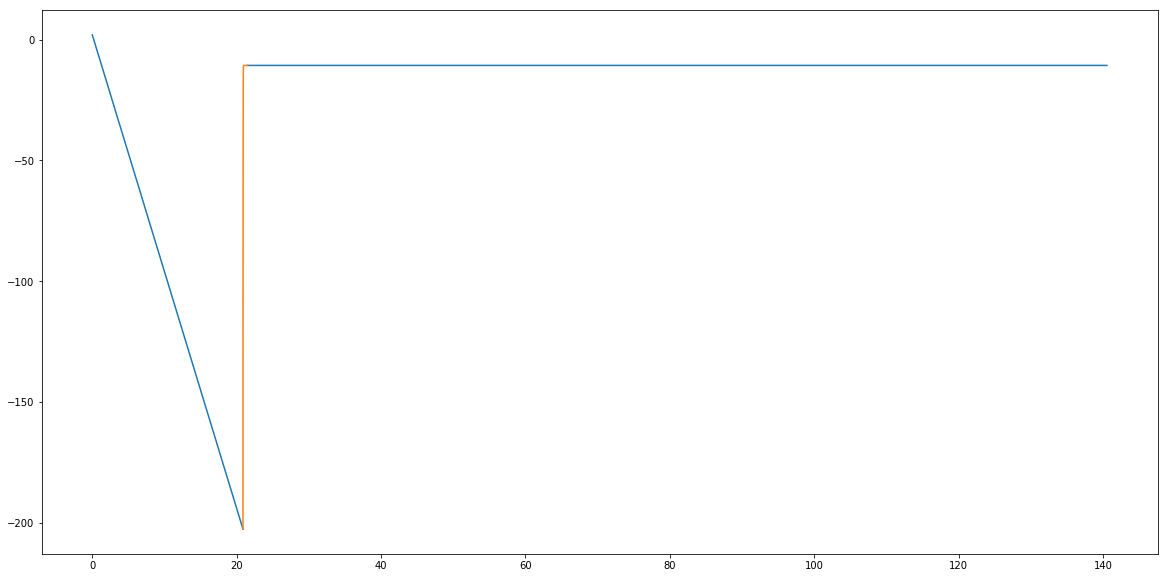

In [4]:
t_1 = [t for t in my_range(0, tf, 0.001)]

width = 20
height = 10
plt.figure(figsize=(width, height))

p_1 = [pos(t) for t in my_range(0, tf, 0.001)]
plt.plot(t_1, p_1)
plt.plot(tiempo, posicion)
plt.show()

### 2. Velocidad vs tiempo

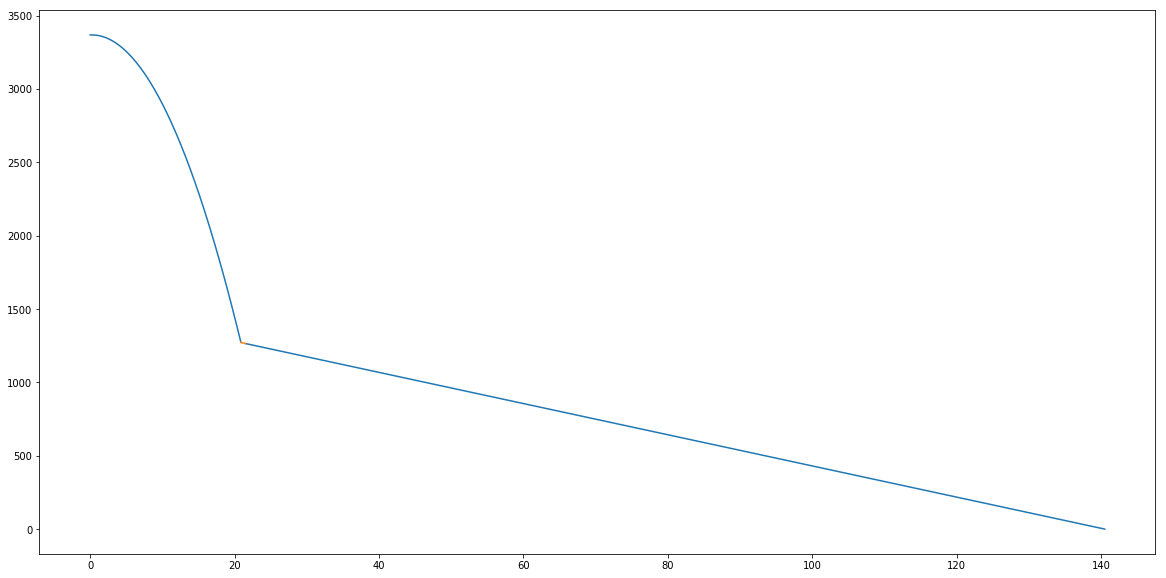

In [5]:
width = 20
height = 10
plt.figure(figsize=(width, height))

v_1 = [vel(t) for t in my_range(0, tf, 0.001)]
plt.plot(t_1, v_1)
plt.plot(tiempo, velocidad)
plt.show()

### 3. Aceleración vs tiempo

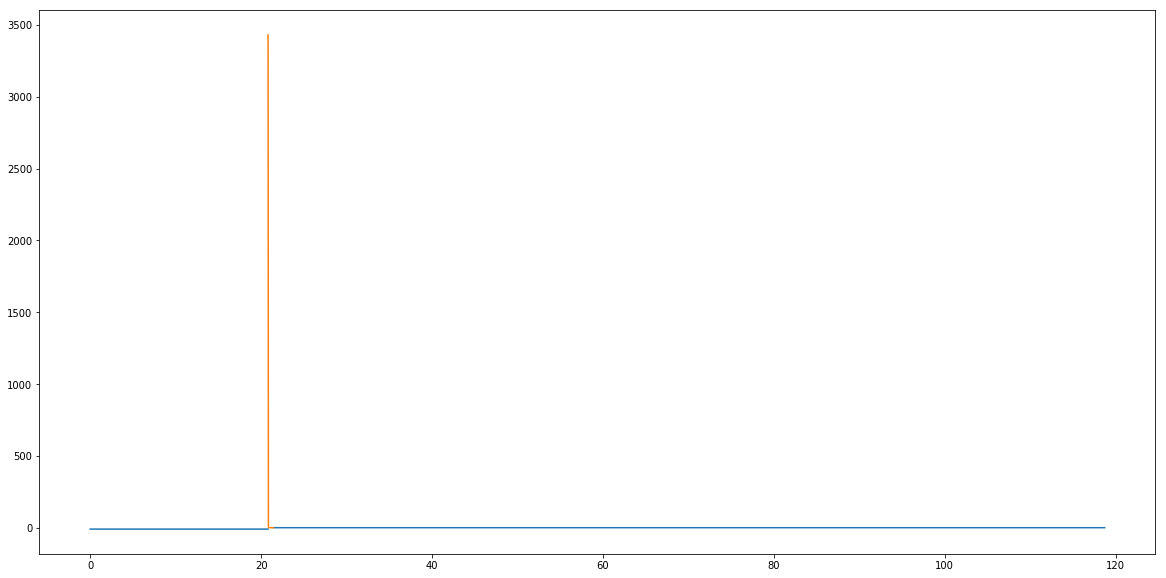

In [20]:
width = 20
height = 10
plt.figure(figsize=(width, height))

a_1 = [acl(t) for t in my_range(0, tf, 0.001)]
plt.plot(t_1, a_1)
plt.plot(tiempo, aceleracion)
plt.show()

### 4. Fuerza de arrastre vs tiempo

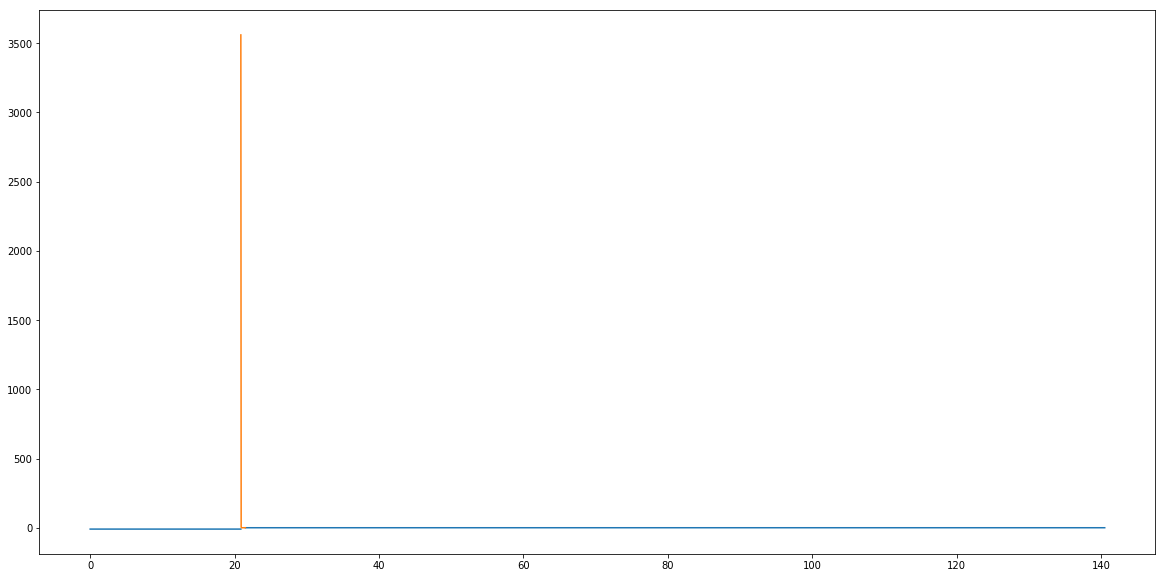

In [10]:
width = 20
height = 10
plt.figure(figsize=(width, height))

a_1 = [acl(t) for t in my_range(0, tf, 0.001)]
plt.plot(t_1, a_1)
plt.plot(tiempo, aceleracion)
plt.show()

### 5. Comparativa de la velocidad, aceleración y posición durante la resolucion de las ecuaciones diferenciales

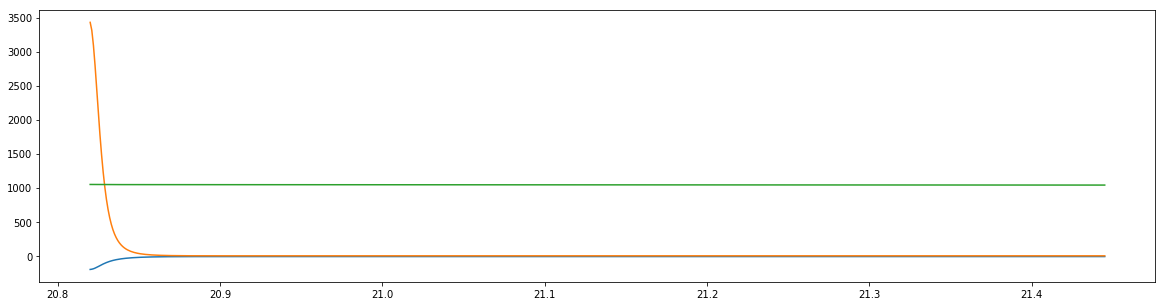

In [9]:
width = 20
height = 5
plt.figure(figsize=(width, height))

plt.plot(tiempo, velocidad)
plt.plot(tiempo, aceleracion)
plt.plot(tiempo, posicion)
plt.show()